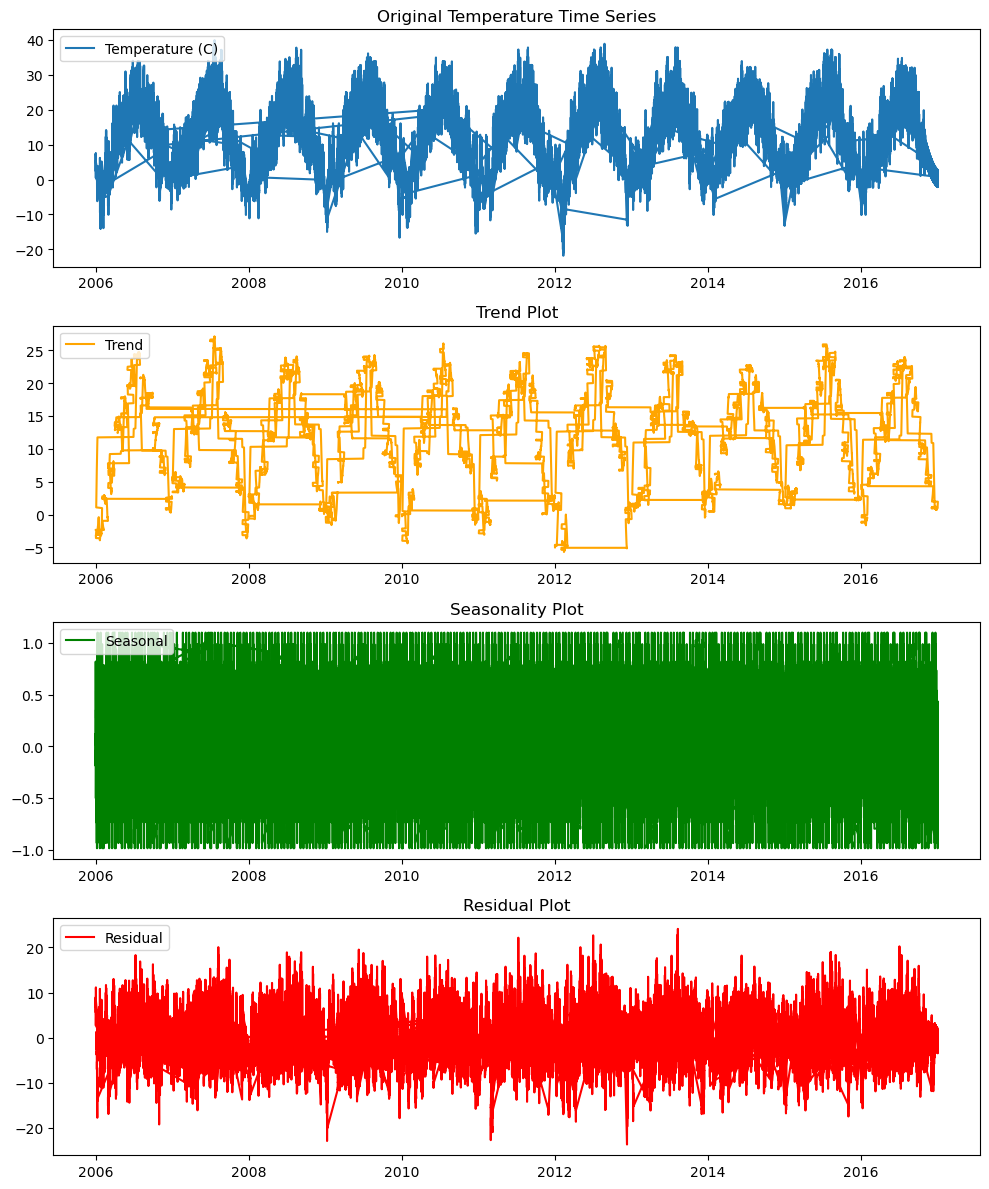

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load dataset and parse date
df = pd.read_csv("weatherHistory.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')

# Step 2: Set datetime as index
df = df.set_index('Formatted Date')

# Step 3: Drop missing temperature values
df = df.dropna(subset=['Temperature (C)'])

# Step 4: Perform seasonal decomposition
# Daily data, approximate yearly seasonality: period=365
decomposition = seasonal_decompose(df['Temperature (C)'], model='additive', period=365)

# Step 5: Plot decomposition
plt.figure(figsize=(10, 12))

# Original Time Series
plt.subplot(411)
plt.plot(df['Temperature (C)'], label='Temperature (C)')
plt.legend(loc='upper left')
plt.title('Original Temperature Time Series')

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Plot')

# Seasonal
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonality Plot')

# Residual
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
